## Generate a image based on promts

In [1]:
import base64
from IPython.display import Image, display
from langchain_core.messages import AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-preview-image-generation")

## Main fnuction

In [2]:
def generate_image_from_prompt(prompt_text: str, output_file: str = "output.jpg"):
    message = {
        "role": "user",
        "content": prompt_text,
    }

    response = llm.invoke(
        [message],
        generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
    )

    def _get_image_base64(response: AIMessage) -> str:
        image_block = next(
            block
            for block in response.content
            if isinstance(block, dict) and block.get("image_url")
        )
        return image_block["image_url"].get("url").split(",")[-1]

    def save_image_from_base64(base64_str: str, filename: str = "output.png") -> None:
        with open(filename, "wb") as f:
            f.write(base64.b64decode(base64_str))
        print(f"Image saved as {filename}")

    # Extract base64 string
    image_base64 = _get_image_base64(response)

    # Display image
    display(Image(data=base64.b64decode(image_base64), width=300))

    # Save image to file
    save_image_from_base64(image_base64, output_file)

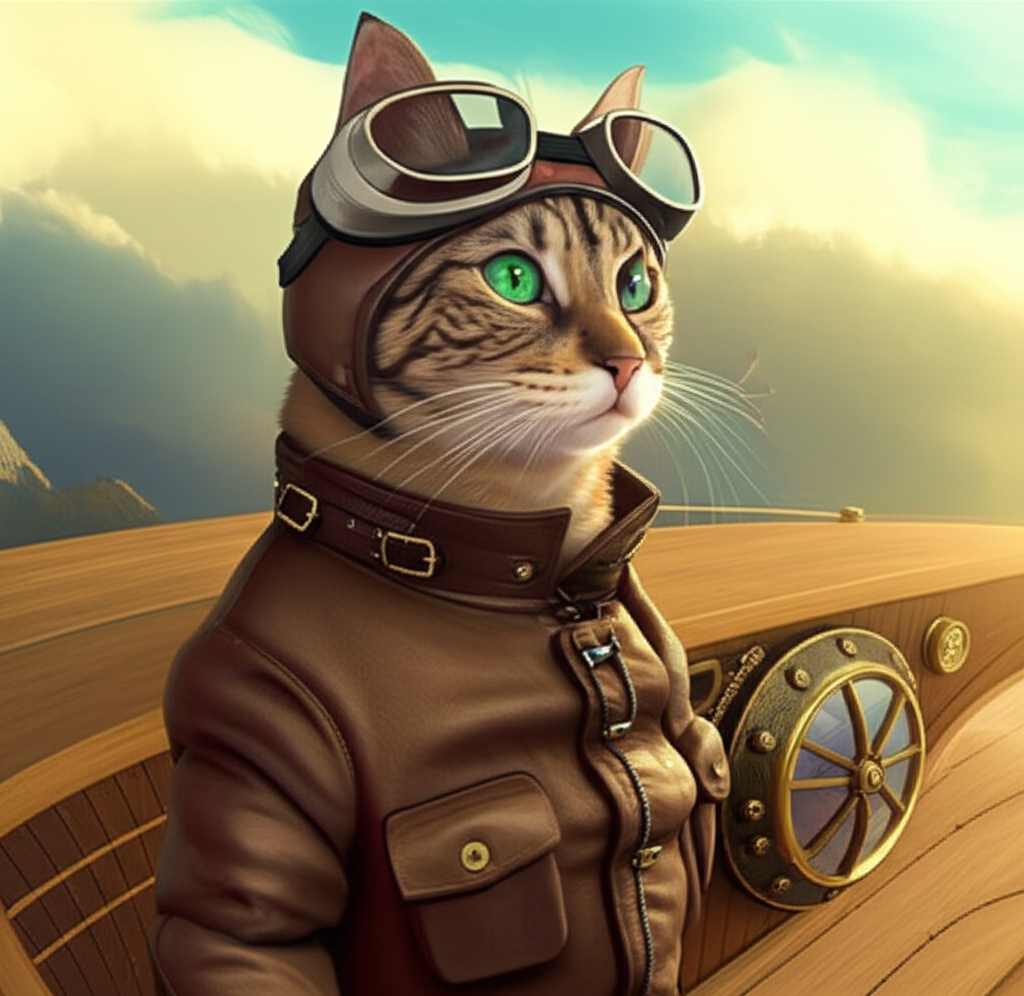

Image saved as output.png


In [3]:
promt = "A realistic tabby cat, with distinct stripes and bright green eyes, wearing a snug leather aviator jacket and vintage goggles perched on its forehead. The cat stands confidently on the deck of a beautifully crafted steam-powered airship, made of polished wood and brass, with intricate gears and cogs visible in the machinery. The airship sails gracefully through a cloudy sky, with soft sunlight filtering through the clouds, casting a warm glow on the scene. In the background, hints of distant mountains can be seen, adding depth to the sky."
file_name = "output.png"
generate_image_from_prompt(promt, file_name)